<a href="https://colab.research.google.com/github/kthanikonda/DataEngineering/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
%matplotlib inline


In [144]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [145]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)


In [146]:
soup = BeautifulSoup(html, 'lxml')
type(soup)


bs4.BeautifulSoup

In [147]:
# Get the title
title = soup.title
print(title)


<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [148]:
# Print out the text
text = soup.get_text()
#print(soup.text)


In [149]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [150]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))


mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [151]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])


[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

           

In [152]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)


[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [153]:
bs4.element.ResultSet

bs4.element.ResultSet

In [154]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


In [155]:
import re

In [156]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    clean3 = re.sub(r'[\r\n]+', ' ', clean2)
    clean3 = ' '.join(clean3.split())

    list_rows.append(clean3)
print(clean2)
type(clean2)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

In [157]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, JARED WILSON , M, TIGARD, OR, 36:21, ..."
6,"[2, 573, NATHAN A SUSTERSIC , M, PORTLAND, OR,..."
7,"[3, 687, FRANCISCO MAYA , M, PORTLAND, OR, 37:..."
8,"[4, 623, PAUL MORROW , M, BEAVERTON, OR, 38:34..."
9,"[5, 569, DEREK G OSBORNE , M, HILLSBORO, OR, 3..."


In [158]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ]
7,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ]


In [159]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ]


In [160]:
col_labels = soup.find_all('th')

In [161]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


In [162]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


In [163]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


In [164]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]


In [165]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [166]:
df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [167]:
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape


<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     578 non-null    object
 1    Bib       578 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.2+ KB


(578, 9)

In [168]:
df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ]


In [169]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ]


In [170]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F


In [171]:
df7.columns = df7.columns.str.strip()

time_list = df7['Time'].tolist()

time_mins = []
for i in time_list:
    parts = i.strip().split(':')
    if len(parts) == 3:
        h, m, s = parts
        minutes = int(h)*60 + int(m) + int(s)/60
    elif len(parts) == 2:
        m, s = parts
        minutes = int(m) + int(s)/60
    else:
        minutes = None
    time_mins.append(minutes)


df7['Runner_mins'] = time_mins


df7.head()



,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F,39.350000


In [172]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


([<matplotlib.axis.XTick at 0x7ac4b78db690>], [Text(1, 0, 'Runners')])

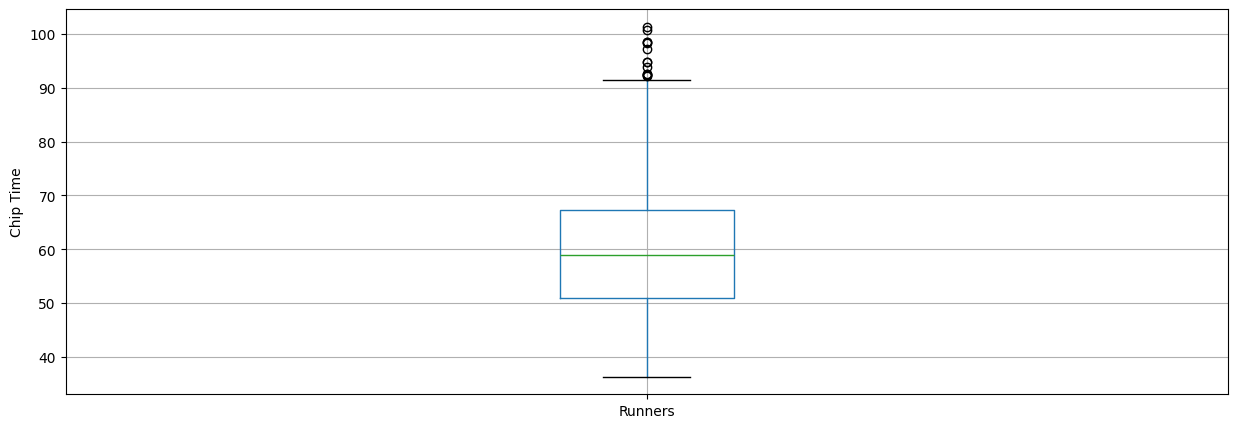

In [173]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

<ipython-input-174-69d9daa153b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


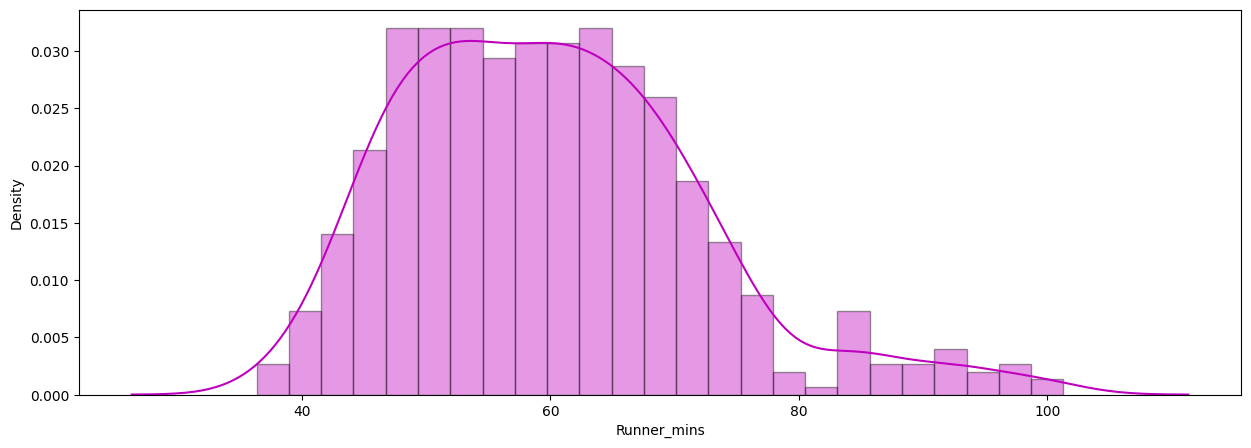

In [174]:

x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


<ipython-input-175-2935b7b93255>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
<ipython-input-175-2935b7b93255>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m_fuko, hist=False, kde=True, rug=F

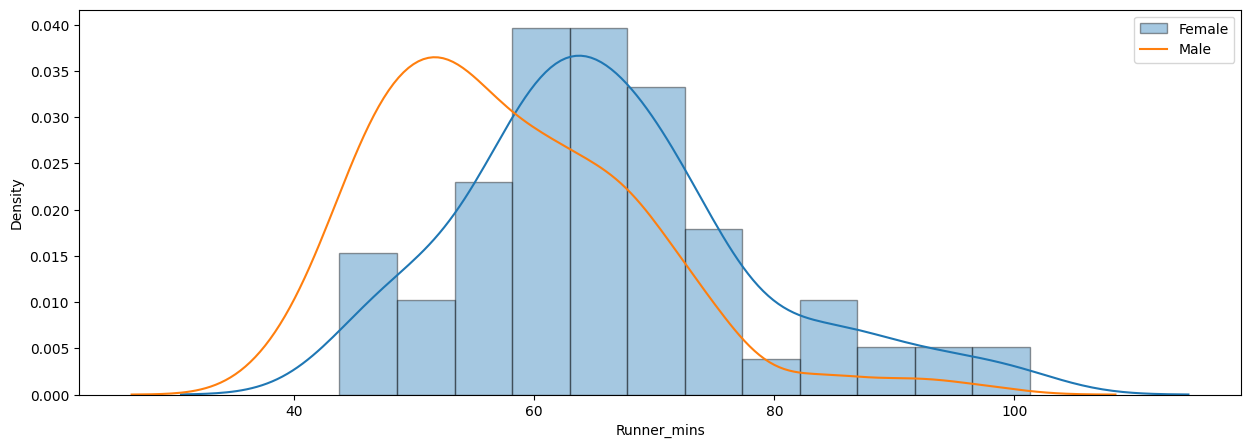

In [175]:
f_fuko = df7.loc[df7['Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7['Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


In [176]:
g_stats = df7.groupby("Gender", as_index=True).describe()
print(g_stats)


       Runner_mins                                                         \
             count       mean        std        min        25%        50%   
Gender                                                                      
F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               
              75%         max  
Gender                         
F       72.058333  101.300000  
M       64.804167   98.516667  


Text(0.5, 0.98, '')

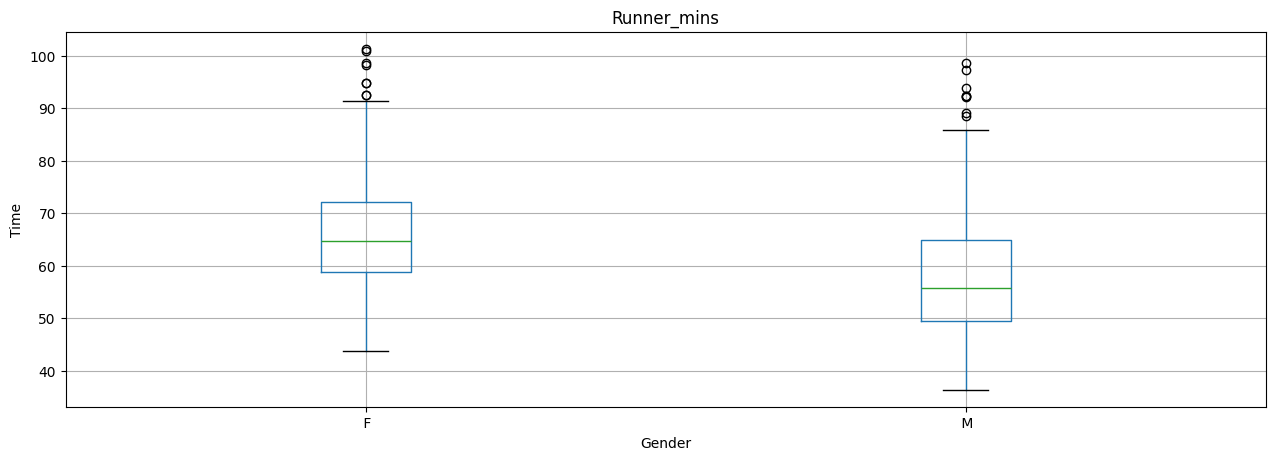

In [177]:
df7.boxplot(column='Runner_mins', by='Gender')
plt.ylabel('Time')
plt.suptitle("")